In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## 0. preprocessing

In [2]:
path = "./Garbage classification/"
listTruelabels = ["cardboard","glass","metal","paper","plastic","trash"]

# make tuple list [(filename.jpg, 0~6: index of listTruelabels)]
dataset = []
num_file = 100
for idx, truelabel in enumerate(listTruelabels):
    
    listFilenames = [file_ for path_, dir_, file_ in os.walk(path+truelabel)][0][:num_file]
    listTrue = [int(idx) for i in range(num_file)]
    listBinary = list(zip(listFilenames, listTrue))
    dataset += listBinary

In [3]:
# Shuffle data
np.random.seed(42)

npDataset = np.array(dataset) # shape : [600,2]
print(npDataset.shape)

np.random.shuffle(npDataset)
print(npDataset)

(600, 2)
[['glass108.jpg' '1']
 ['plastic116.jpg' '4']
 ['trash34.jpg' '5']
 ...
 ['metal162.jpg' '2']
 ['plastic130.jpg' '4']
 ['glass100.jpg' '1']]


In [4]:
# split train and test dataset
npTrain = npDataset[:480] 
npTest = npDataset[480:]
print(npTrain.shape, npTest.shape)

(480, 2) (120, 2)


#### 1. Train dataset

In [5]:
# jpg to array for train set
for idx, i in enumerate(npTrain):
    im = np.asarray(Image.open(path + listTruelabels[int(npTrain[idx][1])] +"/"+ npTrain[idx][0]).convert("L")) # [384, 512, 3]
    reshape_im = np.reshape(im,[1,-1])
    if idx == 0:
        x_train = reshape_im
        y_train = [npTrain[idx,1]]   
        continue
    
    x_train = np.concatenate((x_train, reshape_im), axis = 0) # [B, 384 * 512 * 3]
    y_train = np.concatenate((y_train, [npTrain[idx, 1]]), axis = 0) # [B,]

print(x_train.shape, y_train.shape)

(480, 196608) (480,)


#### 2. Test dataset

In [6]:
# jpg to array for test set
for idx, i in enumerate(npTest):
    im = np.asarray(Image.open(path + listTruelabels[int(npTest[idx][1])] +"/"+ npTest[idx][0]).convert("L"))
    reshape_im = np.reshape(im,[1,-1])
    if idx == 0:
        x_test = reshape_im
        y_test = [npTest[idx,1]]   
        continue
    
    x_test = np.concatenate((x_test, reshape_im), axis = 0) # [B, 384 * 512 * 3]
    y_test = np.concatenate((y_test, [npTest[idx, 1]]), axis = 0) # [B,]

print(x_test.shape, y_test.shape)

(120, 196608) (120,)


## visualization

4 plastic


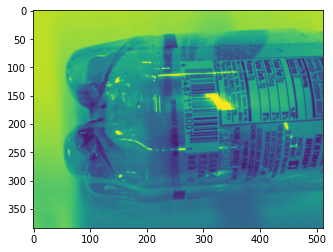

In [7]:
some_digit = x_train[1]

some_digit_image = some_digit.reshape([384, 512])

plt.imshow(some_digit_image)
print(y_train[1], listTruelabels[int(y_train[1])])

## preprocessing

## SGD classifier

Epoch 1/10
16/16 [==============================] - 9s 583ms/step - loss: 1.8150 - accuracy: 0.1458 - val_loss: 1.8089 - val_accuracy: 0.1750
Epoch 2/10
16/16 [==============================] - 9s 574ms/step - loss: 1.8003 - accuracy: 0.1500 - val_loss: 1.7913 - val_accuracy: 0.1500
Epoch 3/10
16/16 [==============================] - 9s 563ms/step - loss: 1.7978 - accuracy: 0.1667 - val_loss: 1.7954 - val_accuracy: 0.1500
Epoch 4/10
16/16 [==============================] - 9s 564ms/step - loss: 1.7973 - accuracy: 0.1625 - val_loss: 1.8019 - val_accuracy: 0.1417
Epoch 5/10
16/16 [==============================] - 9s 560ms/step - loss: 1.7976 - accuracy: 0.1437 - val_loss: 1.8010 - val_accuracy: 0.1500
Epoch 6/10
16/16 [==============================] - 9s 562ms/step - loss: 1.7961 - accuracy: 0.1604 - val_loss: 1.8038 - val_accuracy: 0.1417
Epoch 7/10
16/16 [==============================] - 9s 570ms/step - loss: 1.7953 - accuracy: 0.1562 - val_loss: 1.7997 - val_accuracy: 0.1583
Epoch 

<function matplotlib.pyplot.show(close=None, block=None)>

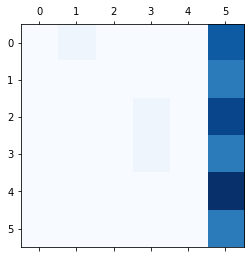

In [8]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Dense(1000, activation="sigmoid"))
model.add(keras.layers.Dense(6, activation="sigmoid"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history=model.fit(x_train, y_train.astype(float), epochs=10, batch_size=30, validation_data=(x_test,y_test.astype(float)))

from sklearn.metrics import confusion_matrix
y_test_pred = model.predict_classes(x_test)
conf_mx = confusion_matrix(y_test.astype(float), y_test_pred)
plt.matshow(conf_mx, cmap=plt.cm.Blues)
plt.savefig("d.png")
plt.show